# Image segmentation with OpenCV

In [2]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt

Foreground background image segmentation. Originial image:


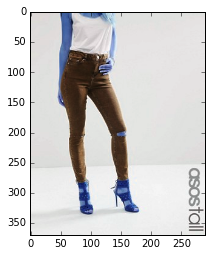

In [11]:
img = cv2.imread('jean.png')
plt.imshow(img)
plt.show()

## Watershed algorithm with OpenCV

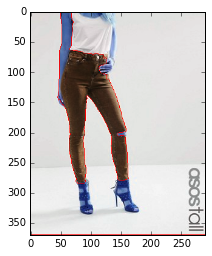

In [7]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
sure_bg = cv2.dilate(opening,kernel,iterations=3)
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers+1
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
img2 = img
img2[markers == -1] = [255,0,0]
plt.imshow(img2)
plt.show()

## Interactive Grabcut algorithm with OpenCV

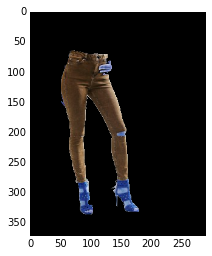

In [8]:
img = cv2.imread('jean.jpg')
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (51,63,135,275)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img2 = img*mask2[:,:,np.newaxis]
plt.imshow(img2)
plt.show()
